In [1]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy


In [2]:
# dataset 4
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1

final weight:
 [[0.46462973]
 [0.5443747 ]
 [0.55129905]
 [0.49613957]
 [0.43449703]]


Text(0,0.5,'loss')

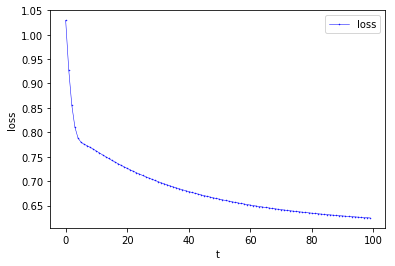

In [8]:
loss_hist_batch = [] # to store the history of loss J(w_t)

# implement batch steepest gradient method here

x = x_d4
y = y_d4

w_dimension = x.shape[1]+1
lam = 0.01
learning_rate = 0.01
alpha_base = 1
num_iter = 100

loss_history = []
w_history = []


x_hat = np.hstack([x,np.ones([x.shape[0],1])])
# w = np.random.uniform(size = [w_dimension, 1])
w = np.random.uniform(size = [w_dimension, 1])+1
y = y.reshape(-1,1)

for t in range(1,num_iter+1):
    
    y_hat = np.dot(x_hat,w)
    loss = 1/n * np.sum(np.log(1+np.exp(-y*np.dot(x_hat, w)))) + lam * np.sum(w*w)
    
    w_history.append(w)
    loss_history.append(loss)
    
    posterior = 1 / (1 + np.exp(-y * np.dot(x_hat, w)));
    direction =  1 / n * np.sum((1 - posterior) * (-y) * x) + 2 * lam * w
    
    w -=  direction

print("final weight:\n", w_history[loss_history.index(min(loss_history))])

loss_hist_batch = loss_history

plt.plot(range(len(loss_history)), loss_hist_batch, 'bo-', linewidth=0.5, markersize=0.5, label='loss')
plt.legend()
plt.xlabel('t')
plt.ylabel('loss')

final weight: [[0.46462973]
 [0.5443747 ]
 [0.55129905]
 [0.49613957]
 [0.43449703]]


Text(0,0.5,'loss')

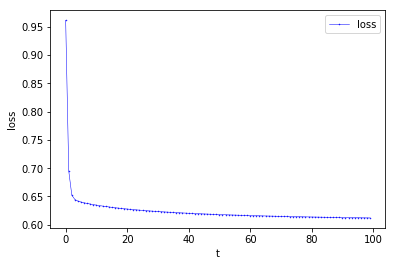

In [12]:
loss_hist_newton = [] # to store the history of loss J(w_t)

# implement Newton based method here

x = x_d4
y = y_d4

lam = 0.01
alpha_base = 1
num_iter = 100

loss_n_history = []
w_n_history = []

x_hat = np.hstack([x,np.ones([x.shape[0],1])])
w_dimension = x_hat.shape[1]
w = np.random.uniform(size = [w_dimension, 1])+1
y = y.reshape(-1,1)

for t in range(1,num_iter+1):
    
    y_hat = np.dot(x_hat,w)
    loss = 1/n * np.sum(np.log(1+np.exp(-y*np.dot(x_hat, w)))) + lam * np.sum(w*w)
    
    w_n_history.append(w)
    loss_n_history.append(loss)
    
    posterior = 1 / (1 + np.exp(-y * np.dot(x_hat, w)));
    grad =  1 / n * np.sum((1 - posterior) * (-y) * x_hat) + 2 * lam * w
    hess = 1 / n * x_hat.T.dot((posterior * (1-posterior) * x_hat)) + 2 * lam 
    
    w = w - np.linalg.inv(hess).dot(grad) * 1.0/np.sqrt(t+10)
    

print("final weight:", w_history[loss_history.index(min(loss_history))])

loss_hist_newton = loss_n_history

plt.plot(range(len(loss_history)), loss_hist_newton, 'bo-', linewidth=0.5, markersize=0.5, label='loss')
plt.legend()
plt.xlabel('t')
plt.ylabel('loss')

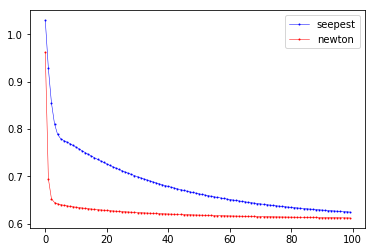

In [13]:
plt.plot(loss_hist_batch, 'bo-', linewidth=0.5, markersize=1, label='seepest')
plt.plot(loss_hist_newton, 'ro-', linewidth=0.5, markersize=1, label='newton')
plt.legend()

Text(0,0.5,'diff from the gold loss')

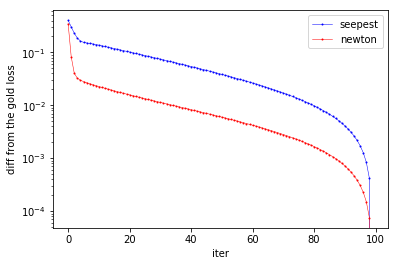

In [14]:
# diff
show_iter = 100
plt.plot(np.abs(loss_hist_batch[:show_iter] - loss_hist_batch[-1]), 'bo-', linewidth=0.5, markersize=1, label='seepest')
plt.plot(np.abs(loss_hist_newton[:show_iter] - loss_hist_newton[-1]), 'ro-', linewidth=0.5, markersize=1, label='newton')
plt.legend()
plt.yscale('log')
plt.xlabel('iter')
plt.ylabel('diff from the gold loss')